<a href="https://colab.research.google.com/github/pranauww/Tensorflow/blob/main/TrafficSignClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import pickle
from tensorflow.keras import layers

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with open("/content/drive/My Drive/Colab Notebooks/train.p", mode='rb') as training_data:
  train = pickle.load(training_data)
with open("/content/drive/My Drive/Colab Notebooks/valid.p", mode='rb') as validation_data:
  valid = pickle.load(validation_data)
with open("/content/drive/My Drive/Colab Notebooks/test.p", mode='rb') as testing_data:
  test = pickle.load(testing_data)

In [5]:
X_train, Y_train = train['features'], train['labels']
X_validation, Y_validation = valid['features'], valid['labels']
X_test, Y_test = test['features'], test['labels']

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
Y_train.shape

(34799,)

1

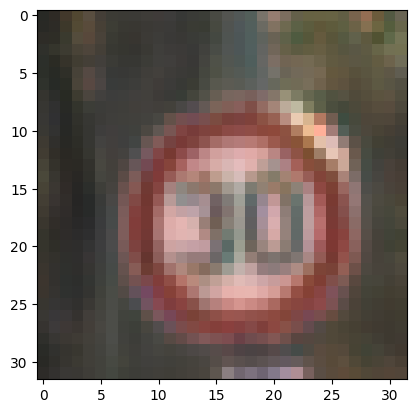

In [8]:
i = 3100
plt.imshow(X_train[i])
Y_train[i]

7

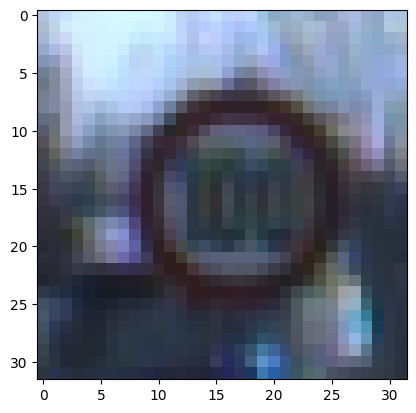

In [9]:
i = 3001
plt.imshow(X_validation[i])
Y_validation[i]

29

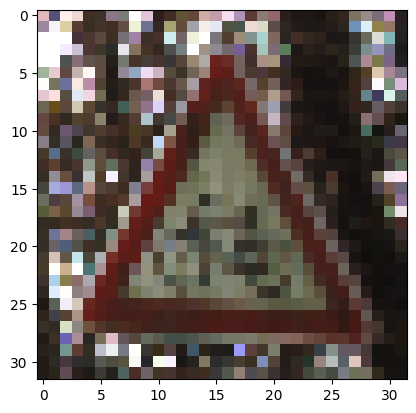

In [10]:
i = 2100
plt.imshow(X_test[i])
Y_test[i]

In [11]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

In [12]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [13]:
X_train_gray.shape

(34799, 32, 32, 1)

In [14]:
X_test_gray.shape

(12630, 32, 32, 1)

In [15]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [16]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [17]:
X_train_gray_norm

array([[[[-0.42447917],
         [-0.5       ],
         [-0.5546875 ],
         ...,
         [ 0.98958333],
         [ 0.98958333],
         [ 0.98697917]],

        [[-0.15104167],
         [-0.34635417],
         [-0.52083333],
         ...,
         [ 0.9921875 ],
         [ 0.9765625 ],
         [ 0.90625   ]],

        [[-0.03645833],
         [-0.24739583],
         [-0.5078125 ],
         ...,
         [ 0.96875   ],
         [ 0.91145833],
         [ 0.8203125 ]],

        ...,

        [[-0.79427083],
         [-0.80989583],
         [-0.82291667],
         ...,
         [-0.8359375 ],
         [-0.84635417],
         [-0.8359375 ]],

        [[-0.78645833],
         [-0.80208333],
         [-0.80989583],
         ...,
         [-0.84895833],
         [-0.84635417],
         [-0.8359375 ]],

        [[-0.80208333],
         [-0.8125    ],
         [-0.81770833],
         ...,
         [-0.84114583],
         [-0.83854167],
         [-0.83854167]]],


       [[[-0.50520833],


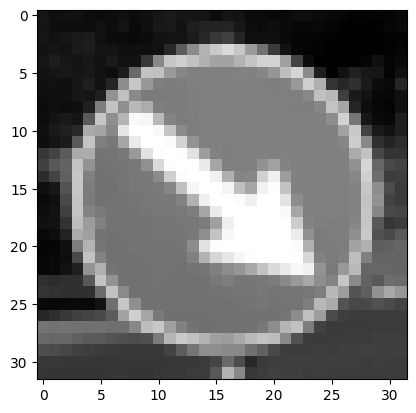

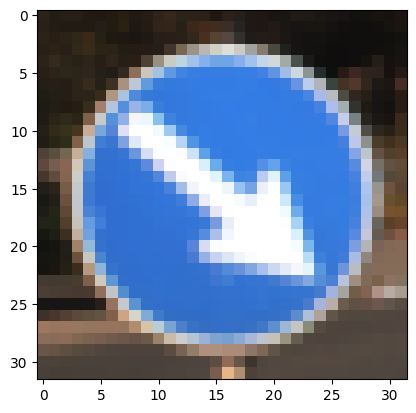

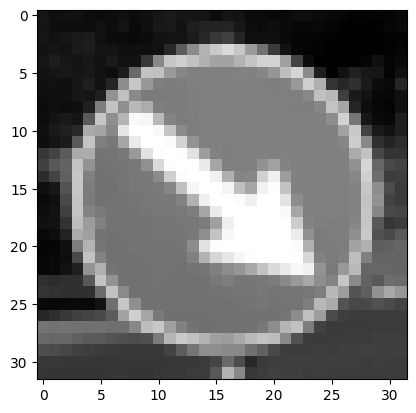

In [18]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

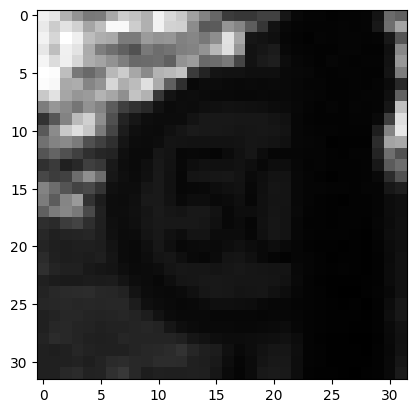

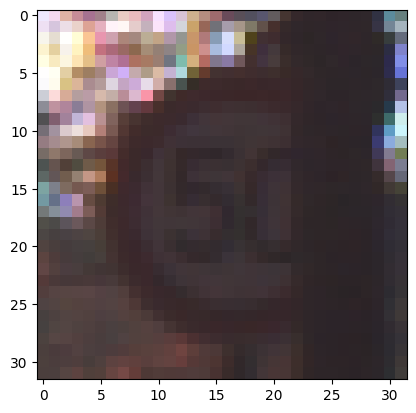

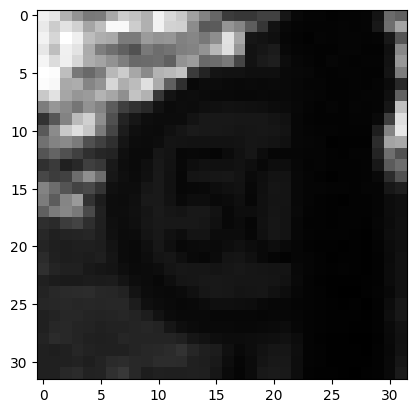

In [19]:
i = 600
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

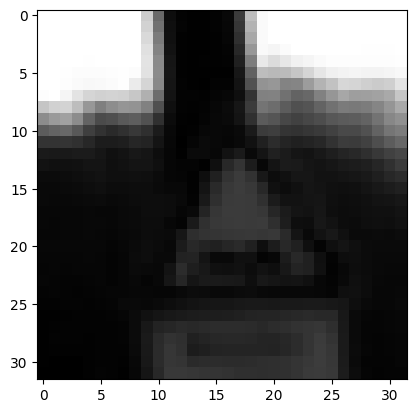

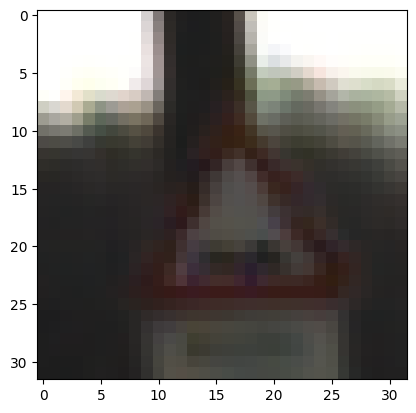

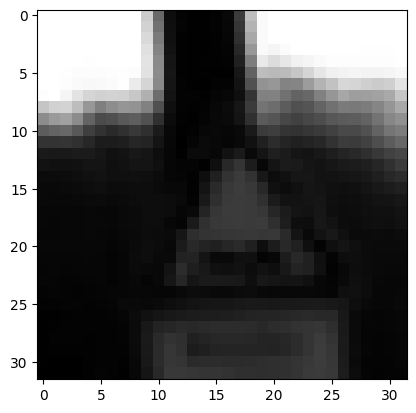

In [20]:
i = 630
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

In [21]:
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1) ))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu' ))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation = 'relu'))
LeNet.add(layers.Dense(84, activation = 'relu'))
LeNet.add(layers.Dense(43, activation = 'softmax'))

LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [22]:
LeNet.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [23]:
history = LeNet.fit(X_train_gray_norm,
                    Y_train,
                    batch_size = 500,
                    epochs = 50,
                    verbose = 1,
                    validation_data = (X_validation_gray_norm, Y_validation))

Epoch 1/50
70/70 [==============================] - 21s 245ms/step - loss: 3.1128 - accuracy: 0.1937 - val_loss: 2.5538 - val_accuracy: 0.3177
Epoch 2/50
70/70 [==============================] - 15s 215ms/step - loss: 1.5980 - accuracy: 0.5515 - val_loss: 1.3847 - val_accuracy: 0.5957
Epoch 3/50
70/70 [==============================] - 15s 214ms/step - loss: 0.9155 - accuracy: 0.7401 - val_loss: 0.9561 - val_accuracy: 0.7222
Epoch 4/50
70/70 [==============================] - 15s 213ms/step - loss: 0.6583 - accuracy: 0.8171 - val_loss: 0.8668 - val_accuracy: 0.7467
Epoch 5/50
70/70 [==============================] - 15s 213ms/step - loss: 0.5247 - accuracy: 0.8563 - val_loss: 0.7823 - val_accuracy: 0.7651
Epoch 6/50
70/70 [==============================] - 16s 228ms/step - loss: 0.4392 - accuracy: 0.8786 - val_loss: 0.6927 - val_accuracy: 0.7916
Epoch 7/50
70/70 [==============================] - 15s 212ms/step - loss: 0.3744 - accuracy: 0.8984 - val_loss: 0.6522 - val_accuracy: 0.8141

In [24]:
score = LeNet.evaluate(X_test_gray_norm, Y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 7ms/step - loss: 1.2990 - accuracy: 0.8689
Test Accuracy: 0.8688836097717285


In [24]:
history.history.keys()

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

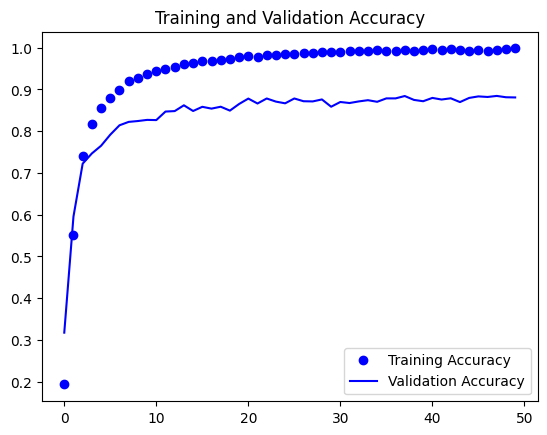

In [26]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

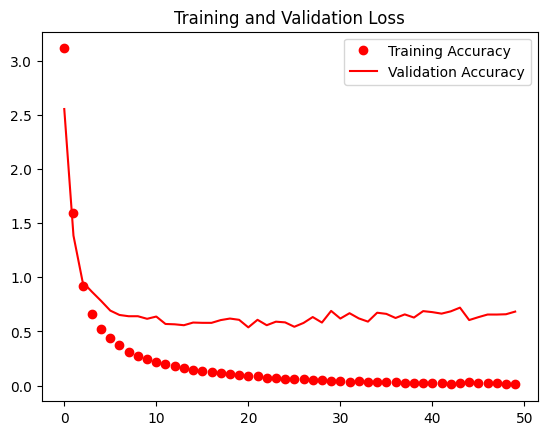

In [27]:
plt.plot(epochs, loss, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation Loss')
plt.legend()

In [32]:
predicted_classes = np.argmax(LeNet.predict(X_test_gray_norm), axis=-1)
Y_true = Y_test

395/395 [==============================] - 5s 12ms/step


<Axes: >

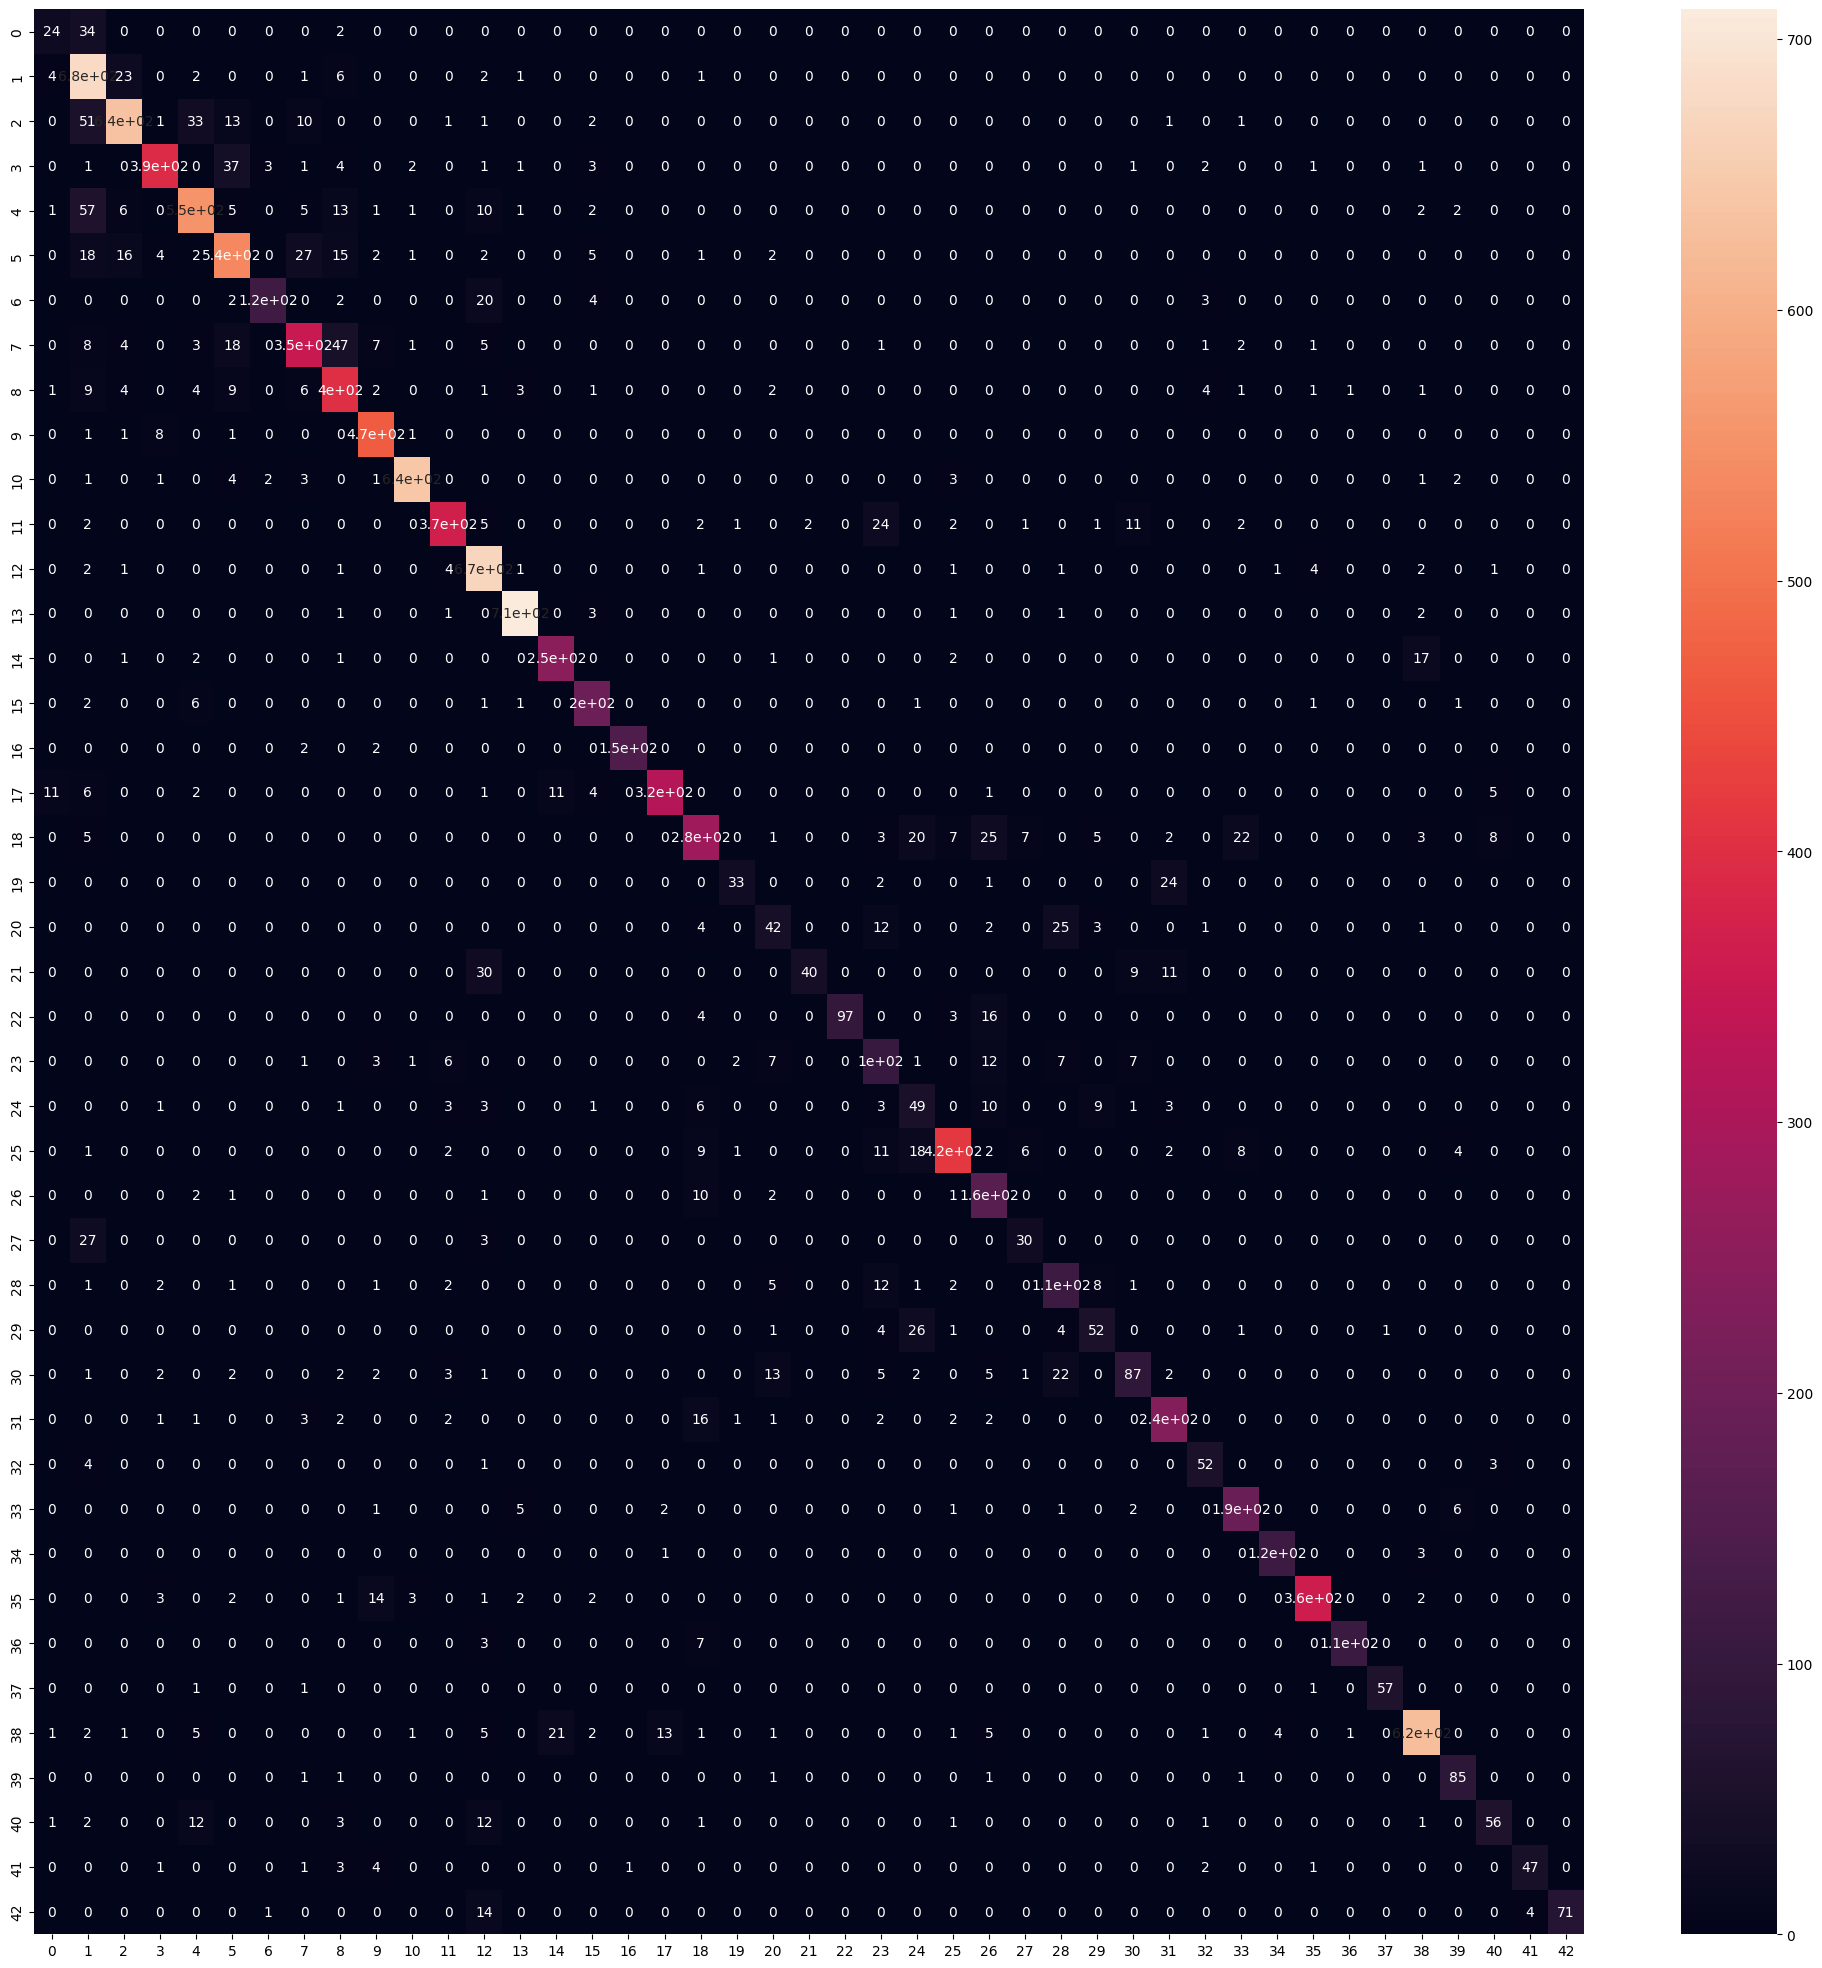

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

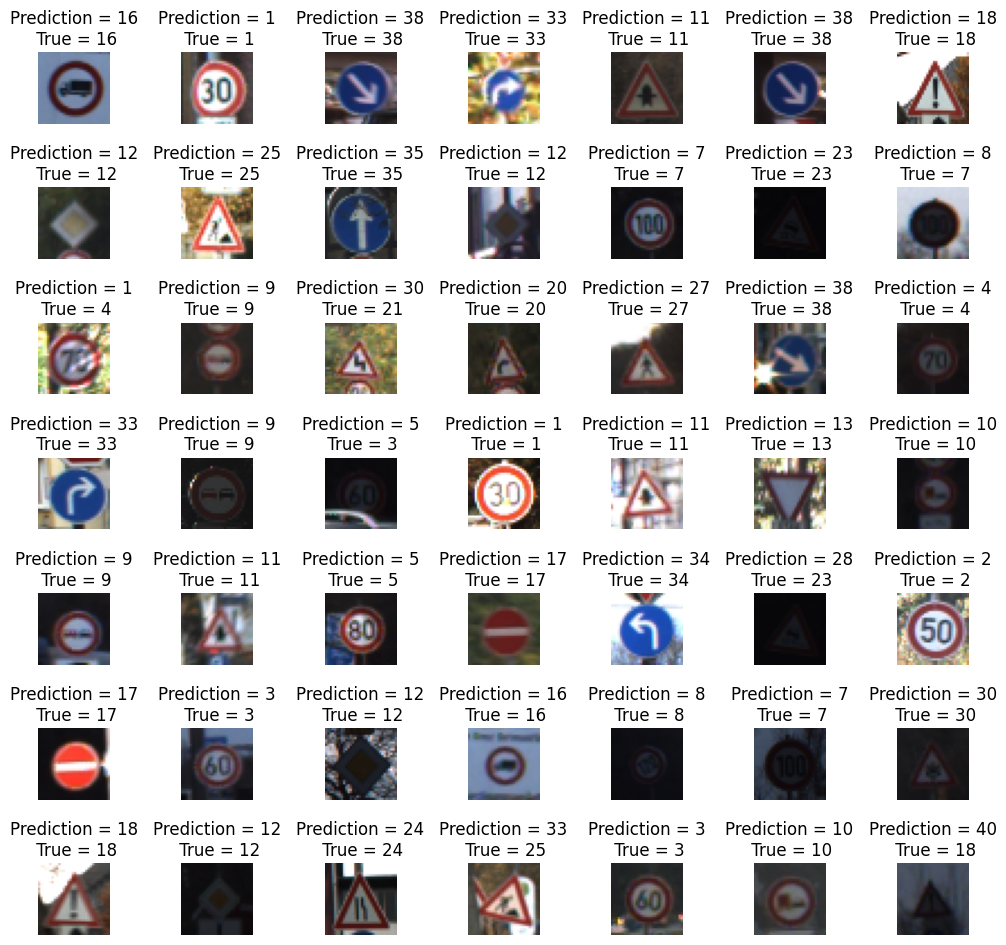

In [35]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], Y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)